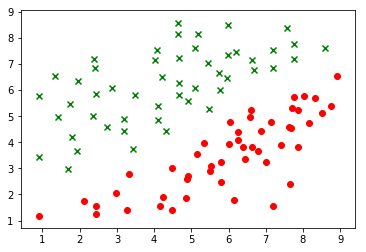

In [5]:
#Question 1
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv('training_data.csv')
arr = data.values
for i in arr:
    if(i[2]==1):
        plt.scatter(i[0],i[1], marker='o',c='red')
    else:
        plt.scatter(i[0],i[1],marker='x',c='green')
plt.show()

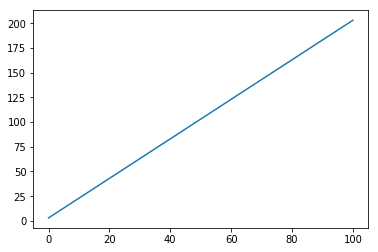

In [17]:
#Question 2
x= np.linspace(0,100,40)
y = np.array([])
for i in x:
    y = np.append(y,[2*i+3])
plt.plot(x,y)
plt.show()



In [114]:
#Question 3
import math
def sigmoid(z):
    temp = 1 + (np.exp(-z))
    return 1/temp
v = np.random.randint(-1000, 1000, 10)
v1 = []
print(v)
v1 = sigmoid(v)
print(v1)

[ 150  160  216 -871  297 -915 -595 -632 -443  568]
[1.00000000e+000 1.00000000e+000 1.00000000e+000 0.00000000e+000
 1.00000000e+000 0.00000000e+000 3.93353725e-259 3.35650607e-275
 4.05083466e-193 1.00000000e+000]


In [115]:
#Question 4
def hypothesis(theta, x):
    if(sigmoid(np.dot(theta,x))<0.5):
        return 0
    else:
        return 1


In [116]:
#Question 5
from numpy import vstack
def cost(theta, X, y):
    c = 0
    for i in range(len(X)):
        temp = hypothesis(theta, X[i])
        c = c + (-y[i]* np.log(temp) - (1-y[i])*np.log(1-temp)) 
    return c/len(X)



(99, 2)
Estimated regression coefficients: [ 9.67108338e-17  2.37613956e-01 -2.62009889e-01]
No. of iterations: 10000
No of correct predictions 99


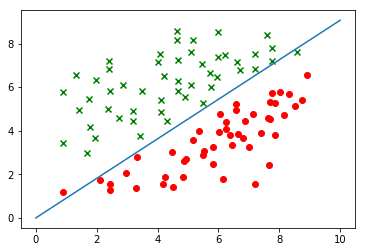

In [127]:
#Question 6
from sklearn.preprocessing import MinMaxScaler
from numpy import vstack
def norm(x):
    min_max_scaler=MinMaxScaler()
    X_scaled=min_max_scaler.fit_transform(x)
    return X_scaled

def gradient(x,theta,y):
    h = []
    for i in x:
        h.append(hypothesis(theta,i))
    h = np.array(h)
    error = np.dot(x.T, (h-y))/y.shape[0]
    return np.array(error)
def gradient_descent(X,y,theta):
    alpha = 0.1
    num_iter = 10000
    for i in range(num_iter):
        e = gradient(X,theta,y)
        theta = theta - alpha * e
    return theta, num_iter
def predict(theta, X):
    h = []
    for i in X:
        h.append(hypothesis(theta,i))
    h = np.array(h)
    return h
def logistic_reg():
    X = data.values[:,:2]
    y = data.values[:,2]
    X = norm(X)
    print(X.shape)
    temp = np.ones(len(X)).reshape(len(X),1)
    X = vstack((temp.T,X.T)).T
    theta = np.ones(X.shape[1])
    theta, num_iter = gradient_descent(X,y,theta)
    print("Estimated regression coefficients:", theta) 
    print("No. of iterations:", num_iter)
    y_pred = predict(theta,X)
    print("No of correct predictions", np.sum(y==y_pred))
    return theta,y_pred


theta, y_pred = logistic_reg()
x = np.linspace(0,10,45)
x2 = []
for i in x:
    x2.append(-1*(theta[0]+theta[1]*i)/theta[2])
plt.plot(x,x2)
arr = data.values
for i in arr:
    if(i[2]==1):
        plt.scatter(i[0],i[1], marker='o',c='red')
    else:
        plt.scatter(i[0],i[1],marker='x',c='green')
plt.show()

In [123]:
#Question 7
from sklearn.linear_model import LogisticRegression
X = data.values[:,:2]
y = data.values[:,2]
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
print(clf.predict(X[:2,:]))
print(clf.predict_proba(X[:2,:]))
clf.score(X,y)


[1. 1.]
[[0.02065529 0.97934471]
 [0.00145789 0.99854211]]


1.0

In [128]:
#Question 8,9,10
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_2 = clf.predict(X)
print("Confusion Matrix", confusion_matrix(y,y_pred_2))
print("Accuracy Score", accuracy_score(y,y_pred_2))
target_names = ["class0", "class1"]
print("Classification report", classification_report(y,y_pred_2))

Confusion Matrix [[50  0]
 [ 0 49]]
Accuracy Score 1.0
Classification report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        49

   micro avg       1.00      1.00      1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [139]:
#Question 11
from sklearn import metrics
from sklearn.model_selection import train_test_split

data = pd.read_csv('loan_data.csv')
arr = data.values
X = arr[:,6:11]
X[0,2]=0
print(X)
y = arr[:,-1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

y_pred_prob = clf.predict_prob(X_test)
print(y_pred_prob)

[[5849 0.0 0 360 1.0]
 [4583 1508.0 128 360 1.0]
 [3000 0.0 66 360 1.0]
 ...
 [8072 240.0 253 360 1.0]
 [7583 0.0 187 360 1.0]
 [4583 0.0 133 360 0.0]]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [129]:
#Question 12
print("Accuracy Score using sklearn", accuracy_score(y,y_pred_2))
print("Accuracy Score using user defined function", accuracy_score(y,y_pred))


Accuracy Score using sklearn 1.0
Accuracy Score using user defined function 1.0
